# Data Science 101

[*Andrew Wheeler*, PhD](mailto:andrew.wheeler@hms.com)

This is an example notebook to go along with the Data Science 101 presentation. 

In [1]:
#Loading in the libraries we will be using
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import os

#Setting the working directory to where our data is stored
os.chdir(r'C:\Users\e009156\Documents\DataScience_Notes\Learning_Materials\DataSci_101\MachineLearning_101\Analysis')

#Reading in the CSV data
brfss_dat = pd.read_csv('Prepped_BRFSS2015.csv')

#A quick view of the first few rows of data
brfss_dat.head()

,Obese_BMI,CurrentSmoker,SEX,MinActWeek,AgeMid
0,1,0,Male,120.0,70
1,0,0,Female,0.0,60
2,0,0,Male,336.0,70
3,0,0,Female,420.0,30
4,0,0,Female,300.0,60


In [2]:
#Estimating a logistic regression equation
#and a random forest model

#Changing sex to dummy variable, regression does not understand text
brfss_dat['Male'] = 1*(brfss_dat['SEX'] == 'Male')
ind_vars = ['Male','MinActWeek','AgeMid','CurrentSmoker']

logit_model = LogisticRegression(penalty='none', solver='newton-cg')
logit_model.fit(X = brfss_dat[ind_vars], y = brfss_dat['Obese_BMI'])

#setting the tree depth so it only have at max 5 leaves
#n_estimators is the number of trees
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=50)
rf_model.fit(X = brfss_dat[ind_vars], y = brfss_dat['Obese_BMI'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [3]:
#Getting the predicted probability of obesity per our model
pred_probL = logit_model.predict_proba(X = brfss_dat[ind_vars])[::,1]
pred_probR = rf_model.predict_proba(X = brfss_dat[ind_vars])[::,1]

#Generating a confusion matrix, setting threshold to predict obese at 27%
th = 0.27
con_matL = pd.DataFrame(confusion_matrix(brfss_dat['Obese_BMI'], pred_probL > th),
                       columns=['Predict No','Predict Yes'], index=['Not Obese', 'Obese'])
con_matR = pd.DataFrame(confusion_matrix(brfss_dat['Obese_BMI'], pred_probR > th),
                       columns=['Predict No','Predict Yes'], index=['Not Obese', 'Obese'])

#The correct guesses are on the diagonal of the confusion matrix
accuracyL = (con_matL.iloc[0,0] + con_matL.iloc[1,1] ) / len(brfss_dat)
print("Accuracy Logit Model")
print("%.2f" % accuracyL)
print( con_matL )

accuracyR = (con_matR.iloc[0,0] + con_matR.iloc[1,1] ) / len(brfss_dat)
print("\nAccuracy Random Forest Model")
print("%.2f" % accuracyR)
print( con_matR )

Accuracy Logit Model
0.56
           Predict No  Predict Yes
Not Obese        4661         3572
Obese            1366         1557

Accuracy Random Forest Model
0.58
           Predict No  Predict Yes
Not Obese        4704         3529
Obese            1133         1790


In [4]:
#Apply predictions to newdata

act = range(0,480)

new_dat = pd.DataFrame({'Male': 1, 'MinActWeek': act, 'AgeMid': 40, 'CurrentSmoker': 0})
new_dat['PredProbLogitMale'] = logit_model.predict_proba(new_dat[ind_vars])[::,1]
new_dat['PredProbRFMale'] = rf_model.predict_proba(new_dat[ind_vars])[::,1]
new_dat.head(10)

,Male,MinActWeek,AgeMid,CurrentSmoker,PredProbLogitMale,PredProbRFMale
0,1,0,40,0,0.254304,0.290965
1,1,1,40,0,0.254141,0.290965
2,1,2,40,0,0.253979,0.289936
3,1,3,40,0,0.253816,0.278924
4,1,4,40,0,0.253653,0.279819
5,1,5,40,0,0.253491,0.279917
6,1,6,40,0,0.253328,0.279917
7,1,7,40,0,0.253166,0.279284
8,1,8,40,0,0.253004,0.278602
9,1,9,40,0,0.252841,0.277503


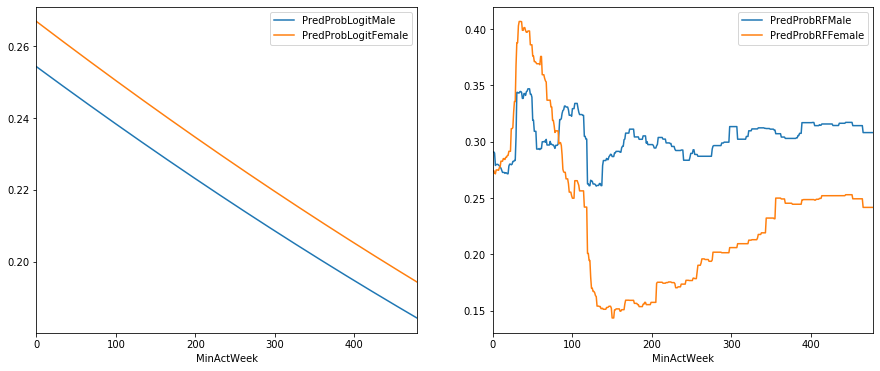

In [6]:
#Line graph comparing males to females for rf vs logit
new_dat['Male'] = 0
new_dat['PredProbLogitFemale'] = logit_model.predict_proba(new_dat[ind_vars])[::,1]
new_dat['PredProbRFFemale'] = rf_model.predict_proba(new_dat[ind_vars])[::,1]

import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, figsize=[15,6]) #sharey=True to get them to have the same y axis
#Logit predictions, RF predictions
new_dat[['MinActWeek','PredProbLogitMale','PredProbLogitFemale']].plot(x='MinActWeek', ax = axes[0])
new_dat[['MinActWeek','PredProbRFMale','PredProbRFFemale']].plot(x='MinActWeek', ax= axes[1])
plt.show()